In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
import sklearn as sk

%matplotlib inline

In [2]:
from numpy.linalg import inv

X = np.array([
    [1, 1],
    [1, 2],
    [1, 3],
    [1, 4],
])

X

array([[1, 1],
       [1, 2],
       [1, 3],
       [1, 4]])

In [3]:
inv(X)

LinAlgError: Last 2 dimensions of the array must be square

In [4]:
X.T

array([[1, 1, 1, 1],
       [1, 2, 3, 4]])

In [5]:
X.T @ X

array([[ 4, 10],
       [10, 30]])

In [6]:
inv(X.T @ X)

array([[ 1.5, -0.5],
       [-0.5,  0.2]])

In [7]:
y = 3 + X * 2

w_mle = inv(X.T @ X) @ X.T @ y

In [8]:
y

array([[ 5,  5],
       [ 5,  7],
       [ 5,  9],
       [ 5, 11]])

In [9]:
w_mle

array([[5.0000000e+00, 3.0000000e+00],
       [4.4408921e-16, 2.0000000e+00]])

In [10]:
e = [-.3, .3, -.2, .3]
e

[-0.3, 0.3, -0.2, 0.3]

In [11]:
w = np.array([1, .5])
y = X @ w + e

In [12]:
w, w_mle

(array([1. , 0.5]),
 array([[5.0000000e+00, 3.0000000e+00],
        [4.4408921e-16, 2.0000000e+00]]))

In [13]:
y

array([1.2, 2.3, 2.3, 3.3])

In [14]:
PHI2 = np.array([
    [1,1,1],
    [1,2,4],
    [1,3,9],
    [1,4,6],
])


In [15]:
w_mle = inv(PHI2.T @ PHI2) @ PHI2.T @ y
w_mle

array([ 0.7       ,  0.75857143, -0.06428571])

In [16]:
e_train = np.sum((y - PHI2 @ w_mle) ** 2)
e_train

0.16514285714285723

In [17]:
np.isclose([1,0,0,0,2], 0)

array([False,  True,  True,  True, False])

In [18]:
np.isclose([1,0,0,0,2, 0.1], 0)

array([False,  True,  True,  True, False, False])

In [19]:
np.isclose([1,0,0,0,2, 0.1, 0.001], 0)

array([False,  True,  True,  True, False, False, False])

In [20]:
np.isclose([1,0,0,0,2, 0.1, .0001], 0)

array([False,  True,  True,  True, False, False, False])

In [21]:
np.isclose([1,0,0,0,2, 0.1, .00001], 0)

array([False,  True,  True,  True, False, False, False])

In [22]:
np.isclose([1,0,0,0,2, 0.1, .000001], 0)

array([False,  True,  True,  True, False, False, False])

In [23]:
np.isclose([1,0,0,0,2, 0.1, .00000000000001], 0)

array([False,  True,  True,  True, False, False,  True])

In [24]:
np.random.seed(0)

In [25]:
X

array([[1, 1],
       [1, 2],
       [1, 3],
       [1, 4]])

In [28]:
np.hstack(
    (
        np.ones(( len(X), 1 ))
        ,
        X
    )
)

array([[1., 1., 1.],
       [1., 1., 2.],
       [1., 1., 3.],
       [1., 1., 4.]])

In [30]:
from sklearn.linear_model import LinearRegression

In [32]:
reg = LinearRegression()
reg.fit(X, y)
reg.score(X, y)

0.8989807474518686

In [34]:
reg.coef_[0]

0.0

In [35]:
reg.coef_

array([0.  , 0.63])

In [36]:
from sklearn.linear_model import PoissonRegressor

clf = PoissonRegressor()
X = [[1,2],[2,3], [3,4], [4,3]]
y=[12,17,22,21]
clf.fit(X, y)

PoissonRegressor()

In [37]:
clf.score(X, y)

0.9904855148891535

In [38]:
clf.coef_

array([0.12109212, 0.15836976])

In [39]:
clf.intercept_

2.0885914156053205

In [40]:
clf.predict([[5,6]])

array([38.25485782])

In [41]:
clf.predict(X)

array([12.50868306, 16.54170759, 21.87505182, 21.07461353])

In [44]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [46]:
data = load_breast_cancer()
X = data.data
y = data.target
X = np.hstack((np.ones((len(y), 1)), X))

In [47]:
X

array([[ 1.     , 17.99   , 10.38   , ...,  0.2654 ,  0.4601 ,  0.1189 ],
       [ 1.     , 20.57   , 17.77   , ...,  0.186  ,  0.275  ,  0.08902],
       [ 1.     , 19.69   , 21.25   , ...,  0.243  ,  0.3613 ,  0.08758],
       ...,
       [ 1.     , 16.6    , 28.08   , ...,  0.1418 ,  0.2218 ,  0.0782 ],
       [ 1.     , 20.6    , 29.33   , ...,  0.265  ,  0.4087 ,  0.124  ],
       [ 1.     ,  7.76   , 24.54   , ...,  0.     ,  0.2871 ,  0.07039]])

In [48]:
StandardScaler().fit_transform(X)

array([[ 0.        ,  1.09706398, -2.07333501, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 0.        ,  1.82982061, -0.35363241, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 0.        ,  1.57988811,  0.45618695, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.        ,  0.70228425,  2.0455738 , ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 0.        ,  1.83834103,  2.33645719, ...,  2.28998549,
         1.91908301,  2.21963528],
       [ 0.        , -1.80840125,  1.22179204, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [49]:
X = StandardScaler().fit_transform(X)

In [50]:
X

array([[ 0.        ,  1.09706398, -2.07333501, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 0.        ,  1.82982061, -0.35363241, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 0.        ,  1.57988811,  0.45618695, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.        ,  0.70228425,  2.0455738 , ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 0.        ,  1.83834103,  2.33645719, ...,  2.28998549,
         1.91908301,  2.21963528],
       [ 0.        , -1.80840125,  1.22179204, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
model = LogisticRegression()

In [54]:
model.fit(X_train, y_train)

LogisticRegression()

In [58]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

In [59]:
(y_pred == y_test).sum() / len(y_test)

0.9736842105263158

In [60]:
accuracy = np.mean(y_pred == y_test)

In [61]:
accuracy

0.9736842105263158

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

In [65]:
data = pd.read_csv('./05. Modeling/02 Learning Algorithms/sms_spam_data/spam.txt', delimiter='\t', header=None, names=['label', 'text'])
data

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [66]:
X = data['text']
y = data['label']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=42, random_state=42)


In [68]:
vectorizer = CountVectorizer()
vectorizer.fit_transform(X_train)

<5530x8679 sparse matrix of type '<class 'numpy.int64'>'
	with 73611 stored elements in Compressed Sparse Row format>

In [69]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.fit_transform(X_test)


In [70]:
X_train.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [71]:
pd.DataFrame(X_train.todense(), columns=vectorizer.get_feature_names_out()).head(5)

ValueError: Shape of passed values is (5530, 8679), indices imply (5530, 369)

In [72]:
pd.DataFrame(X_train.todense(), columns=vectorizer.get_feature_names_out())

ValueError: Shape of passed values is (5530, 8679), indices imply (5530, 369)

In [73]:
vectorizer.get_feature_names_out()

array(['0845', '087187272008', '10p', '150pw', '16', '1st', '2814032',
       '2nd', '3x', '750', '87131', '8pm', 'aa', 'aft', 'after', 'aight',
       'already', 'also', 'am', 'amp', 'and', 'anything', 'ar', 'are',
       'ask', 'at', 'away', 'back', 'be', 'better', 'big', 'blowing',
       'blown', 'blue', 'body', 'bollox', 'bt', 'but', 'buying', 'by',
       'call', 'can', 'cant', 'care', 'changes', 'chennai', 'chikku',
       'christmas', 'claim', 'close', 'colany', 'collect', 'come',
       'comes', 'coming', 'company', 'congratulation', 'contact',
       'content', 'cos', 'costumes', 'could', 'couple', 'crazy', 'cud',
       'customer', 'cute', 'da', 'dat', 'day', 'days', 'dear', 'decide',
       'decision', 'den', 'didn', 'dificult', 'dinner', 'do', 'doing',
       'doit', 'dont', 'down', 'downloaded', 'drinks', 'dun', 'earn',
       'easy', 'eat', 'either', 'er', 'err', 'exactly', 'exhaust', 'fave',
       'fb', 'feeling', 'few', 'fighting', 'fightng', 'find', 'finish',
       

In [74]:
pd.DataFrame(X_train.todense(), columns=vectorizer.get_feature_names_out())

ValueError: Shape of passed values is (5530, 8679), indices imply (5530, 369)

In [76]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

ValueError: X has 369 features, but BernoulliNB is expecting 8679 features as input.

In [81]:
np.array(X_test)

array(<42x369 sparse matrix of type '<class 'numpy.int64'>'
	with 558 stored elements in Compressed Sparse Row format>, dtype=object)

In [82]:
accuracy_score(y_pred, y_test)

ValueError: Found input variables with inconsistent numbers of samples: [114, 42]

In [83]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris

In [86]:
X, y = load_iris(return_X_y=True)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)


In [91]:
clf = GaussianNB()
clf.fit(X_train, y_train)


GaussianNB()

In [92]:
y_pred = clf.predict(X_test)


In [93]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [95]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [96]:
(y_pred == y_test).sum() / len(y_test)

0.9666666666666667

In [97]:
np.mean(y_pred == y_test)

0.9666666666666667

In [100]:
accuracy_score(y_test, y_pred)

0.9666666666666667

In [102]:
iris = sklearn.datasets.load_iris()
digits = sklearn.datasets.load_digits()

In [103]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [104]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [105]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [106]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [107]:
digits.images
[0]

[0]

In [108]:
digits.images[0]


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [110]:
from sklearn.linear_model import LinearRegression

In [111]:
X = np.array([
    [1,2],
    [2,3],
    [3,4],
    [3,3],
])

np.dot(X, np.array([1, 2]))

array([ 5,  8, 11,  9])

In [112]:
np.dot(X, np.array([1, 2])) + 3

array([ 8, 11, 14, 12])

In [113]:
y = np.dot(X, np.array([1, 2])) + 3

In [114]:
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [115]:
reg.score(X, y)

1.0

In [116]:
reg.coef_

array([1., 2.])

In [117]:
reg.intercept_

2.9999999999999964

In [118]:
reg.predict(np.array([[3,5]]))

array([16.])

In [119]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)

In [120]:
clf.fit(
    digits.data[:-1], digits.target[:-1]
)

SVC(C=100.0, gamma=0.001)

In [121]:
clf.predict(digits.data[-4:])

array([0, 8, 9, 8])

In [122]:
digits.data[-4:]

array([[ 0.,  0.,  6., 16., 13., 11.,  1.,  0.,  0.,  0., 16., 15., 12.,
        16.,  1.,  0.,  0.,  3., 16.,  7.,  0., 13.,  6.,  0.,  0.,  4.,
        16.,  0.,  0., 10.,  8.,  0.,  0.,  8., 16.,  0.,  0., 14.,  6.,
         0.,  0.,  5., 16.,  7.,  9., 16.,  5.,  0.,  0.,  1., 15., 16.,
        16., 16.,  1.,  0.,  0.,  0.,  6., 16., 14.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 11., 15.,  1.,  0.,  0.,  0.,  0., 13., 16.,  8.,
         2.,  1.,  0.,  0.,  0., 16., 15., 10., 16.,  5.,  0.,  0.,  0.,
         8., 16., 16.,  7.,  0.,  0.,  0.,  0.,  9., 16., 16.,  4.,  0.,
         0.,  0.,  0., 16., 14., 16., 15.,  0.,  0.,  0.,  0., 15., 15.,
        15., 16.,  0.,  0.,  0.,  0.,  2.,  9., 13.,  6.,  0.,  0.],
       [ 0.,  0.,  2., 10.,  7.,  0.,  0.,  0.,  0.,  0., 14., 16., 16.,
        15.,  1.,  0.,  0.,  4., 16.,  7.,  3., 16.,  7.,  0.,  0.,  5.,
        16., 10.,  7., 16.,  4.,  0.,  0.,  0.,  5., 14., 14., 16.,  4.,
         0.,  0.,  0.,  0.,  0.,  0., 16.,  2.,  0.,  0.,  

In [123]:
digits.target[-4:]

array([0, 8, 9, 8])

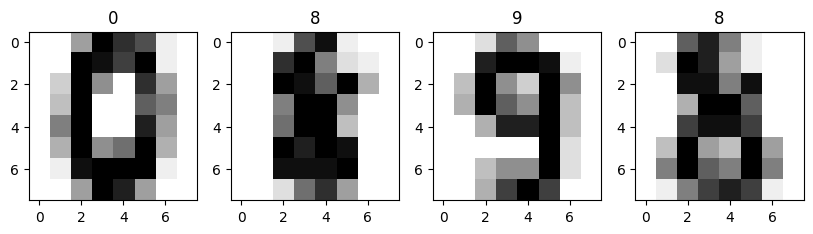

In [132]:
_, axs = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax, image, label in zip(axs, digits.images[-4:], digits.target[-4:]):
    ax.imshow(image, cmap='gray_r')
    ax.set_title(label)

In [134]:
from sklearn.ensemble import RandomForestClassifier

In [136]:
clf = RandomForestClassifier(random_state=0)


In [137]:
X = [
    [1,2,3],
    [11,12,13]
]

In [138]:
y = [0,1]

In [139]:
clf.fit(X, y)

RandomForestClassifier(random_state=0)

In [140]:
from sklearn.preprocessing import StandardScaler

In [141]:
X = [
    [0,15],
    [1,-10]
]

In [143]:
StandardScaler().fit(X).transform(X)

array([[-1.,  1.],
       [ 1., -1.]])

In [145]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [147]:
pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)

In [148]:
X, y = load_iris(return_X_y=True)

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [150]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [151]:
accuracy_score(
    pipe.predict(
        X_test
    ),
    y_test
)

0.9736842105263158

In [152]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

In [153]:
X, y = make_regression(n_samples=1000, random_state=0)
lr = LinearRegression()
result = cross_validate(lr, X, y)
result['test_score']

array([1., 1., 1., 1., 1.])

In [154]:
result

{'fit_time': array([0.12637448, 0.03602481, 0.03570938, 0.03875947, 0.03785777]),
 'score_time': array([0.00209689, 0.00110555, 0.00202608, 0.00118446, 0.00212383]),
 'test_score': array([1., 1., 1., 1., 1.])}

In [155]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from scipy.stats import randint

In [156]:
X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y__train, y_test = train_test_split(X, y, random_state=0)

In [157]:
param_distributions = {'n_estimators': randint(1,5), 'max_depth': randint(5,10)}


In [158]:
search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=0),
    n_iter=5,
    param_distributions=param_distributions,
    random_state=0
)

In [162]:
search.fit(X_train[:1000], y_train[:1000])

ValueError: Found input variables with inconsistent numbers of samples: [1000, 112]

In [163]:
search.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [164]:
search.score(X_test, y_test)

NotFittedError: This RandomizedSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.